In [1]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def getChineseFont():

    return FontProperties(fname='/System/Library/Fonts/PingFang.ttc')

In [3]:
import matplotlib
matplotlib.matplotlib_fname()

'/usr/local/lib/python3.5/dist-packages/matplotlib/mpl-data/matplotlibrc'

# book

In [4]:
book_all_data = pd.read_csv('U_I_R_T.csv')

print('整体数据密度:',len(book_all_data)/(book_all_data.user_id.nunique()*book_all_data.item_id.nunique()))

book_5000_data = pd.read_csv(', sep=' ', header=None, names = ['user_id','item_id','rating']).drop_duplicates()

print('抽样5000数据密度:',len(book_5000_data)/(book_5000_data.user_id.nunique()*book_5000_data.item_id.nunique()))

book_rating_count1 = book_all_data.groupby(by='user_id').count().reset_index()['rating'].tolist()
book_rating_count2 = book_5000_data.groupby(by='user_id').count().reset_index()['rating'].tolist()

整体数据密度: 0.007588184523143589
抽样5000数据密度: 0.007237635705669481


<a list of 100 Patch objects>

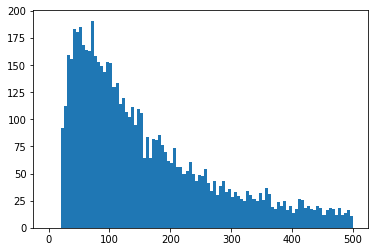

In [5]:
plt.hist(book_rating_count1, range=[0,500],bins =100)[2]

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


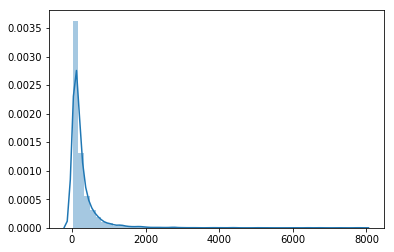

In [6]:
sns.distplot(book_rating_count1, norm_hist=True, hist=True,kde=True,rug=False) 

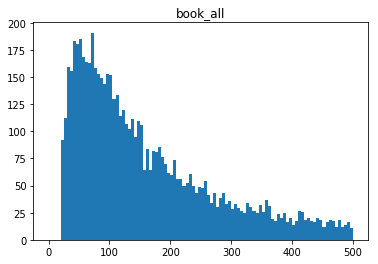

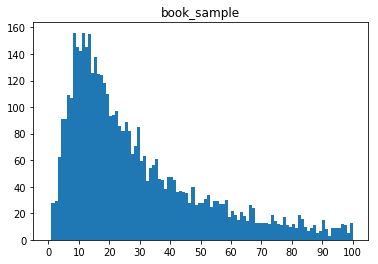

In [7]:
plt.hist(book_rating_count1, range=[0,500],bins =100)[2]
plt.title('book_all')
plt.show()
plt.hist(book_rating_count2, range=[0,100], bins = 100)[2]
plt.xticks(np.arange(0, 110, 10))
plt.title('book_sample')
plt.show()

## 按评分个数抽取

In [15]:
book_rating = pd.read_csv('UbB_all.txt', header = None, sep = ' ', names = ['user_id', 'item_id','rating'])
freq = book_rating.groupby('user_id').count().reset_index()[['user_id','item_id']].rename(columns = {'item_id':'Count'})

print('<=5的user个数:', freq[(freq.Count<=5)].user_id.nunique())
print('<=10的user个数:', freq[(freq.Count<=10)].user_id.nunique())
print('(10, 20]的user个数:', freq[(freq.Count>10)&(freq.Count<=20)].user_id.nunique())
print('(20, 30]的user个数:', freq[(freq.Count>20)&(freq.Count<=30)].user_id.nunique())
print('(30, 50]的user个数:', freq[(freq.Count>30)&(freq.Count<=50)].user_id.nunique())
print('(30, 40]的user个数:', freq[(freq.Count>30)&(freq.Count<=40)].user_id.nunique())
print('(50, 100]的user个数:', freq[(freq.Count>50)&(freq.Count<=100)].user_id.nunique())
print('>100 的user个数:', freq[(freq.Count>100)].user_id.nunique())

<=5的user个数: 301
<=10的user个数: 960
(10, 20]的user个数: 1290
(20, 30]的user个数: 810
(30, 50]的user个数: 840
(30, 40]的user个数: 501
(50, 100]的user个数: 765
>100 的user个数: 309


<a list of 10 Patch objects>

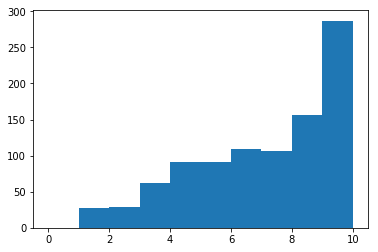

In [13]:
sub_user = freq[(freq.Count<=10)].user_id.tolist()
rating = book_rating[book_rating.user_id.isin(sub_user)]
book_rating_count = rating.groupby(by='user_id').count().reset_index()['rating'].tolist()

plt.hist(book_rating_count, range=[0,10])[2]

<a list of 10 Patch objects>

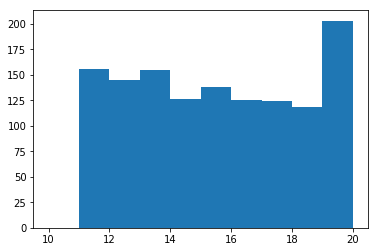

In [17]:
sub_user = freq[(freq.Count>10)&(freq.Count<=20)].user_id.tolist()
rating = book_rating[book_rating.user_id.isin(sub_user)]
book_rating_count = rating.groupby(by='user_id').count().reset_index()['rating'].tolist()

plt.hist(book_rating_count, range=[10, 20])[2]

# movie

In [4]:
movie_all_data = pd.read_csv('movielens_ratings.csv')

整体数据密度: 0.0053998478135544505
抽样5000数据密度: 0.014223753219030019


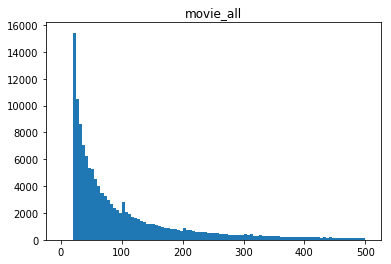

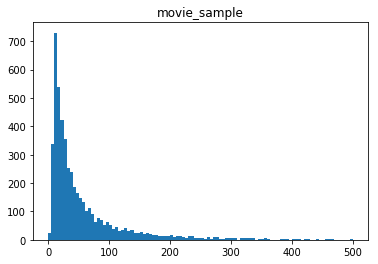

In [5]:
print('整体数据密度:',len(movie_all_data)/(movie_all_data.userId.nunique()*movie_all_data.movieId.nunique()))

movie_5000_data = pd.read_csv('UmM.txt', sep='\t', header=None, names = ['user_id','item_id','rating']).drop_duplicates()

print('抽样5000数据密度:',len(movie_5000_data)/(movie_5000_data.user_id.nunique()*movie_5000_data.item_id.nunique()))

movie_rating_count1 = movie_all_data.groupby(by='userId').count().reset_index()['rating'].tolist()
movie_rating_count2 = movie_5000_data.groupby(by='user_id').count().reset_index()['item_id'].tolist()

plt.hist(movie_rating_count1, range=[0,500],bins =100)[2]
plt.title('movie_all')
plt.show()
plt.hist(movie_rating_count2, range=[0,500], bins = 100)[2]
plt.title('movie_sample')
plt.show()